In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
from robot_imitation_glue.agents.lerobot_agent import LerobotAgent, make_lerobot_policy
from lerobot.common.utils.utils import (
    get_safe_torch_device,
)
# --- Paths ---
checkpoint_path = "outputs/train/2025-11-14/16-43-36_small_dataset_overfit_no_instrumentation_rgb_only/checkpoints/"
train_dataset_path = (
    "/home/rtalwar/robot-imitation-glue/datasets/smol_dataset_overfit_no_instrumentation_rgb_only_resized"
)
train_paths=["020000","040000","060000","080000","100000"]

# --- Setup ---
device = get_safe_torch_device("cuda", log=True)
dataset = LeRobotDataset(repo_id="", root=train_dataset_path)
policies=[make_lerobot_policy(checkpoint_path+tp+"/pretrained_model", train_dataset_path) for tp in train_paths ]
agents = [LerobotAgent(policy, device, lambda x: x) for policy in policies]

# --- Choose episode index ---
episode_idx = 0
episode_indices = dataset.episode_data_index
start_idx = episode_indices["from"][episode_idx].item()
end_idx   = episode_indices["to"][episode_idx].item()

pred_actions = {tp:[] for tp in train_paths}
gt_actions = []
gt_states=[]
# --- Loop through frames in episode ---
for idx in range(start_idx, end_idx):
    frame = dataset[idx]

    obs = {
        # "observation.images.spectogram_image": frame["observation.images.spectogram_image"].unsqueeze(0).to(device),
        "observation.images.wrist_image": frame["observation.images.wrist_image"].unsqueeze(0).to(device),
        "observation.state": torch.tensor(frame["observation.state"]).unsqueeze(0).to(device).float(),
    }
    gt_states.append(frame["observation.state"])
    with torch.no_grad():
        for i,agent in enumerate(agents):
            action_pred = agent.get_action(obs)
            pred_actions[train_paths[i]].append(action_pred)

    gt_action = frame["action"].numpy().squeeze()

    gt_actions.append(gt_action)


Loading weights from local directory
Loading weights from local directory
Loading weights from local directory
Loading weights from local directory
Loading weights from local directory


/tmp/ipykernel_297869/1447163240.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "observation.state": torch.tensor(frame["observation.state"]).unsqueeze(0).to(device).float(),
2025-11-16 20:21:06.931 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot agent observation preprocessor took 0.00 ms
2025-11-16 20:21:07.825 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:65 - Lerobot agent inference took 892.76 ms
2025-11-16 20:21:07.826 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot agent observation preprocessor took 0.00 ms
2025-11-16 20:21:08.675 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:65 - Lerobot agent inference took 848.41 ms
2025-11-16 20:21:08.676 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot ag

In [8]:
pred_actions

{'020000': [array([ 0.9275385, -1.5886421,  0.9531107, -1.2322131, -1.5589885,
         -3.2970095,  0.       ], dtype=float32),
  array([ 0.9306186 , -1.5711694 ,  0.95226276, -1.2237737 , -1.5526636 ,
         -3.294522  ,  0.        ], dtype=float32),
  array([ 0.9319803 , -1.5570943 ,  0.96769404, -1.2302983 , -1.5411885 ,
         -3.2947016 ,  0.        ], dtype=float32),
  array([ 0.9338559 , -1.5273937 ,  0.96244055, -1.2325152 , -1.5400405 ,
         -3.2956772 ,  0.        ], dtype=float32),
  array([ 0.9385021, -1.5038561,  0.9569235, -1.2300955, -1.5393804,
         -3.294572 ,  0.       ], dtype=float32),
  array([ 0.9392111 , -1.4779478 ,  0.94414866, -1.2245812 , -1.5404918 ,
         -3.293526  ,  0.        ], dtype=float32),
  array([ 0.9378536, -1.4435627,  0.9297176, -1.2227831, -1.5428462,
         -3.2926729,  0.       ], dtype=float32),
  array([ 0.9403   , -1.4151373,  0.9044991, -1.221621 , -1.544995 ,
         -3.29405  ,  0.       ], dtype=float32),
  array([ 

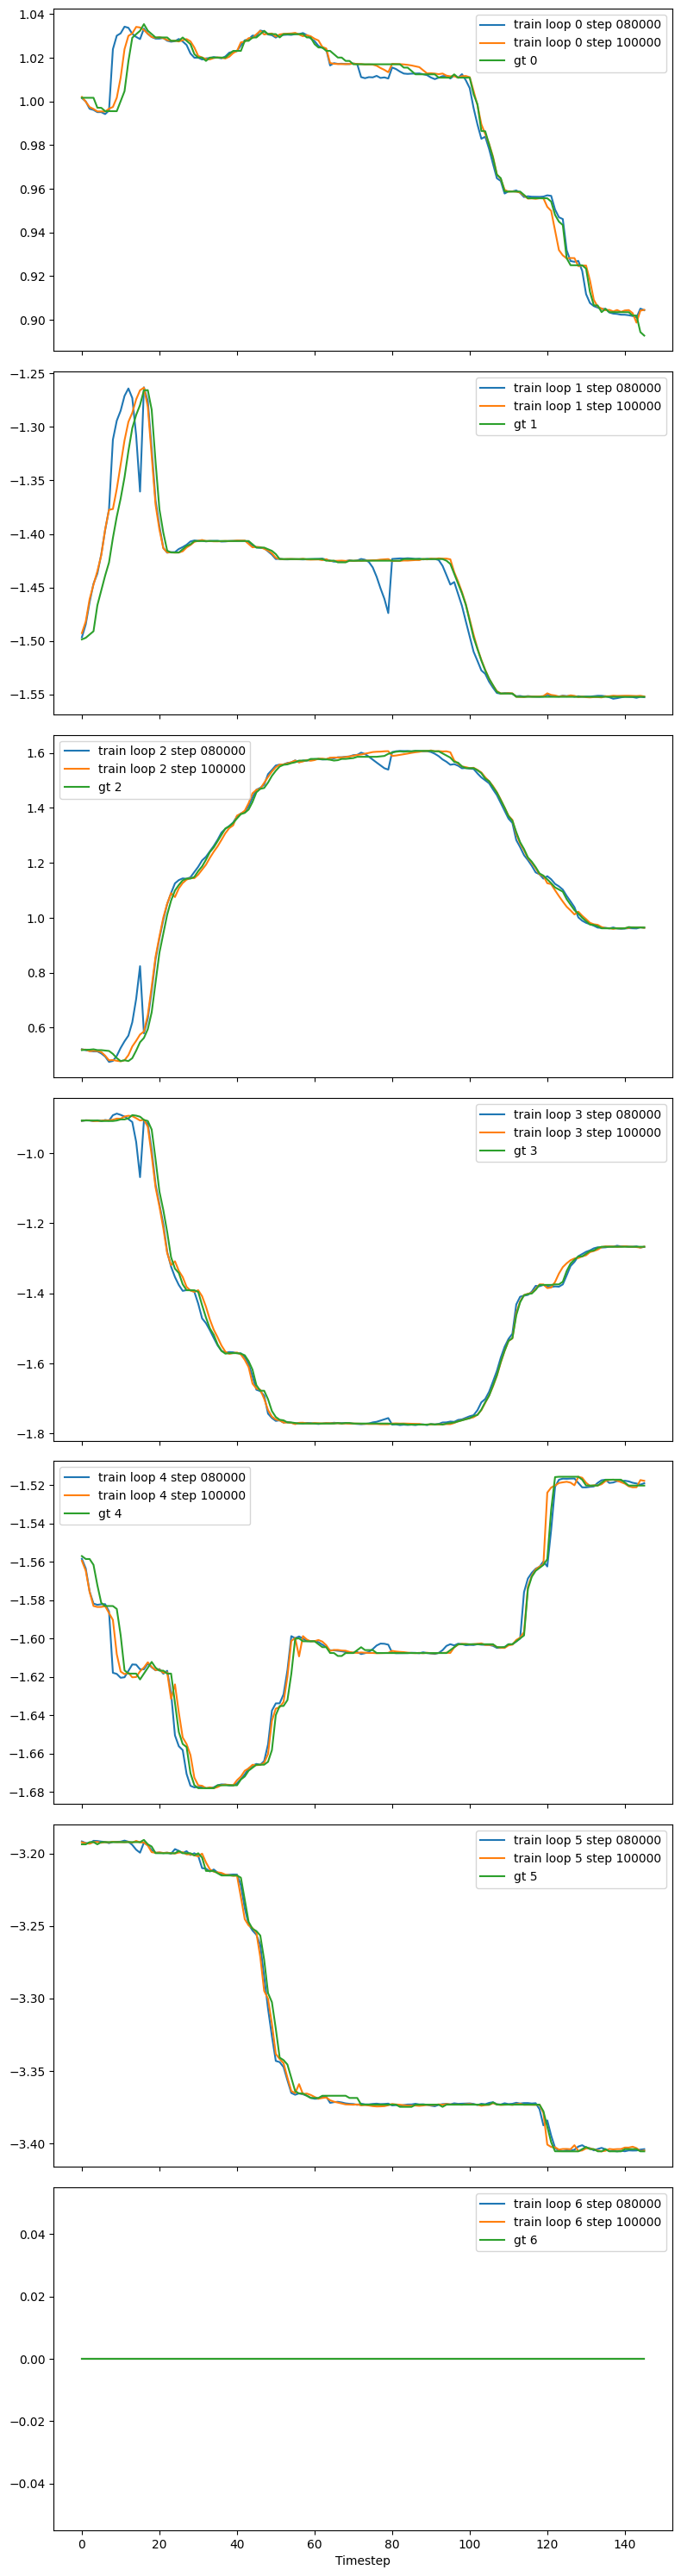

In [26]:

pred_actions2 = {k:np.stack(v) for k,v in pred_actions.items()}
pred_actions2.pop("040000")
pred_actions2.pop("020000")
pred_actions2.pop("060000")
gt_actions2   = np.stack(gt_actions)

# --- Plot train-loop predictions vs ground truth ---
num_dims = gt_actions2.shape[-1]
fig, axs = plt.subplots(num_dims, 1, figsize=(8, 30), sharex=True)
if num_dims == 1:
    axs = [axs]

for i in range(num_dims):
    for k,v in pred_actions2.items():
        axs[i].plot(v[:, i], label=f"train loop {i} step {k}")
    axs[i].plot(gt_actions2[:, i], label=f"gt {i}")
    axs[i].legend()

plt.xlabel("Timestep")
plt.tight_layout()
plt.show()

Resolving data files:   0%|          | 0/86 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/86 [00:00<?, ?it/s]

Loading weights from local directory


/tmp/ipykernel_2533859/403982456.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "observation.state": torch.tensor(frame["observation.state"]).unsqueeze(0).to(device).float(),
2025-11-19 10:02:58.484 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot agent observation preprocessor took 0.00 ms
2025-11-19 10:02:59.786 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:65 - Lerobot agent inference took 1300.94 ms
2025-11-19 10:02:59.815 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot agent observation preprocessor took 0.00 ms
2025-11-19 10:02:59.817 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:65 - Lerobot agent inference took 1.07 ms
2025-11-19 10:02:59.844 | INFO     | robot_imitation_glue.agents.lerobot_agent:get_action:59 - Lerobot age

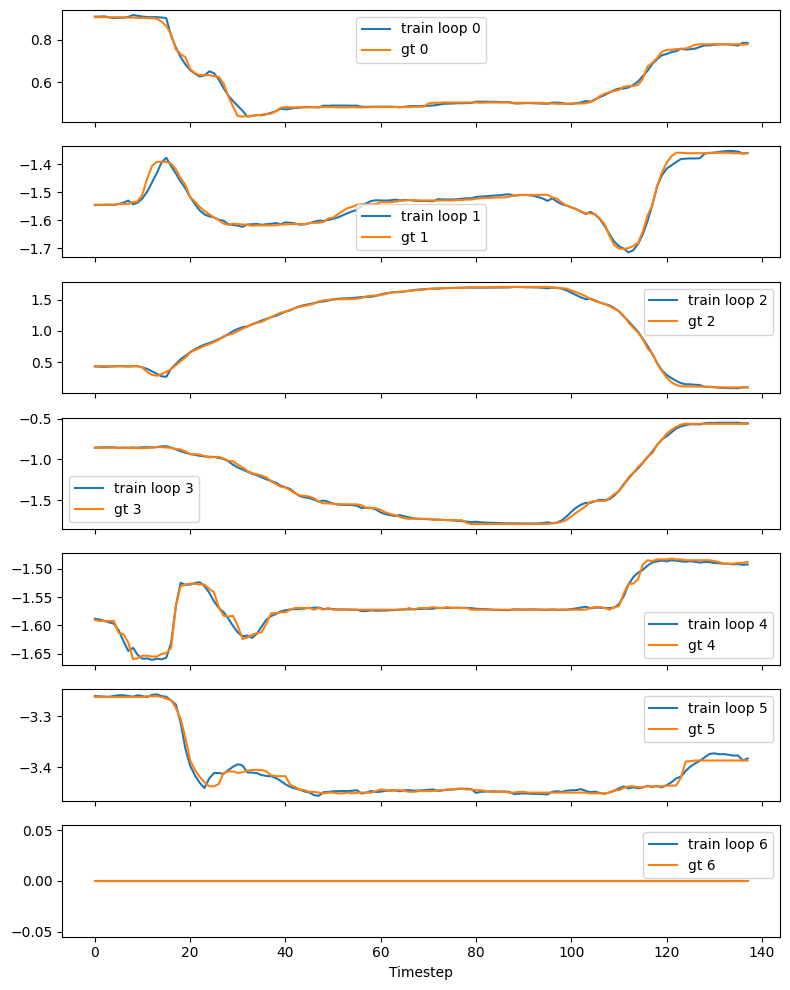

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
from robot_imitation_glue.agents.lerobot_agent import LerobotAgent, make_lerobot_policy
from lerobot.common.utils.utils import (
    get_safe_torch_device,
)
# --- Paths ---
checkpoint_path = "/home/rtalwar/robot-imitation-glue/outputs/train/2025-11-18/17-55-00_rgb_joints_no_instrumentation_bottom_higher_aug/checkpoints/last/pretrained_model"
train_dataset_path = (
    "/home/rtalwar/robot-imitation-glue/datasets/rgb_joints_no_instrumentation_bottom_resized"
)

# --- Setup ---
device = get_safe_torch_device("cuda", log=True)
dataset = LeRobotDataset(repo_id="", root=train_dataset_path)
policy = make_lerobot_policy(checkpoint_path, train_dataset_path)
policy_agent = LerobotAgent(policy, device, lambda x: x)

# --- Choose episode index ---
episode_idx = 0
episode_indices = dataset.episode_data_index
start_idx = episode_indices["from"][episode_idx].item()
end_idx   = episode_indices["to"][episode_idx].item()

pred_actions = []
gt_actions = []
gt_states=[]
# --- Loop through frames in episode ---
for idx in range(start_idx, end_idx):
    frame = dataset[idx]

    obs = {
        # "observation.images.spectogram_image": frame["observation.images.spectogram_image"].unsqueeze(0).to(device),
        "observation.images.wrist_image": frame["observation.images.wrist_image"].unsqueeze(0).to(device),
        "observation.state": torch.tensor(frame["observation.state"]).unsqueeze(0).to(device).float(),
    }
    gt_states.append(frame["observation.state"])
    with torch.no_grad():
        action_pred,used_images,attn_maps = policy_agent.get_action(obs)

    gt_action = frame["action"].numpy().squeeze()

    pred_actions.append(action_pred)
    gt_actions.append(gt_action)

pred_actions = np.stack(pred_actions)
gt_actions   = np.stack(gt_actions)

# --- Plot train-loop predictions vs ground truth ---
num_dims = gt_actions.shape[-1]
fig, axs = plt.subplots(num_dims, 1, figsize=(8, 10), sharex=True)
if num_dims == 1:
    axs = [axs]

for i in range(num_dims):
    axs[i].plot(pred_actions[:, i], label=f"train loop {i}")
    axs[i].plot(gt_actions[:, i], label=f"gt {i}")
    axs[i].legend()

plt.xlabel("Timestep")
plt.tight_layout()
plt.show()

In [6]:
gt_states[0].cpu().numpy()

array([ 9.0657759e-01, -1.5448662e+00,  4.3716556e-01, -8.5493523e-01,
       -1.5842961e+00, -3.2627966e+00,  1.1086956e-03], dtype=float32)

[2025-11-13T08:21:43Z ERROR re_grpc_client::message_proxy::write] Write messages call failed: status: Unknown, message: "transport error", details: [], metadata: MetadataMap { headers: {} }


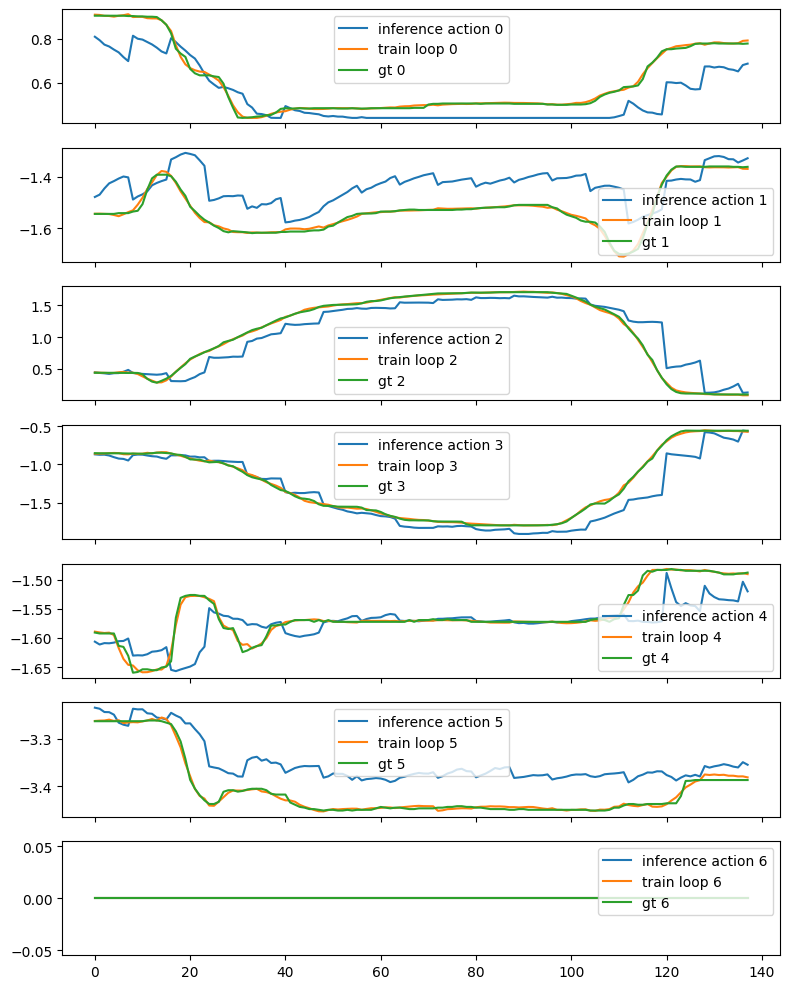

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("inference_logs/inference_run_20251113_144318.csv")

fig, axs = plt.subplots(7, 1, figsize=(8, 10), sharex=True)
for i in range(7):
    axs[i].plot(df["timestep"], df[f"action_{i}"], label=f"inference action {i}")
    axs[i].plot(pred_actions[:, i], label=f"train loop {i}")
    axs[i].plot(gt_actions[:, i], label=f"gt {i}")
    axs[i].legend()
plt.tight_layout()
plt.show()
